In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

1. Toplam gelir verilerini içeren TOTAL_REVENUE ve toplam harcama verilerini içeren TOTAL_EXPENDITURE değişkenlerini inceleyin. Bu değişkenler aykırı değerler içeriyor mu?

2. Toplam gelir (TOTAL_REVENUE) ve toplam harcama (TOTAL_EXPENDITURE) değişkenlerinde aykırı değer tespit ettiyseniz bu derste öğrendiğiniz teknikleri uygulayarak bu aykırı değerleri ortadan kaldırın ve bunu yaptıktan sonra hiçbir aykırı değer kalmadığını doğrulayın.

3. Toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama (TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun (aykırı değerleri temezlemeden). Bu yeni değişkende de aykırı değerler yer almakta mı? Varsa bu aykırı değerleri de temizleyin.

4. Yine toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama(TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun. Fakat bu sefer aykırı değerleri temezledikten sonra bu işlemi yapın. Bu yeni değişkende de aykırı değerler var mı? Varsa bunları da temizlemekte fayda var.

5. Şimdi elimizde üçüncü ve ve dördüncü sorularda oluşturduğumuz iki farklı bütçe değişkeni var. Bu ikisi arasında fark görüyor musunuz?

6. Bizim için bütçe açığı çok önemli bir değişken olsaydı aykırı değerleri temizlemek için hangi yöntem daha iyi olurdu. Üçüncü soruda uguladığınız yöntem mi yoksa dördüncü sorudaki yöntem mi?



In [47]:
states_all = pd.read_csv("states_all.csv")

In [48]:
states_all.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,nan,2678885.00,304177.00,1659028.00,715680.00,2653798.00,1481703.00,...,57948.00,58025.00,41167.00,471564.00,196386.00,676174.00,208.33,252.19,207.96,nan
1,1992_ALASKA,ALASKA,1992,nan,1049591.00,106780.00,720711.00,222100.00,972488.00,498362.00,...,9748.00,8789.00,6714.00,79117.00,30847.00,112335.00,nan,nan,nan,258.86
2,1992_ARIZONA,ARIZONA,1992,nan,3258079.00,297888.00,1369815.00,1590376.00,3401580.00,1435908.00,...,55433.00,49081.00,37410.00,437127.00,175210.00,614881.00,215.25,265.37,206.21,262.17
3,1992_ARKANSAS,ARKANSAS,1992,nan,1711959.00,178571.00,958785.00,574603.00,1743022.00,964323.00,...,34632.00,36011.00,27651.00,281338.00,123113.00,405259.00,210.21,256.31,208.63,264.62
4,1992_CALIFORNIA,CALIFORNIA,1992,nan,26260025.00,2072470.00,16546514.00,7641041.00,27138832.00,14358922.00,...,418418.00,363296.00,270675.00,3286034.00,1372011.00,4717112.00,208.40,260.89,196.76,nan


Eyalet bazında enterpolasyon daha doğru olacaktır. 

In [54]:
sutunlar = states_all.columns
print(sutunlar)

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')


In [56]:
# 4 sutundaki kayip degerlerin asiri olmasindan oturu listeden cikartilmisti.
#AVG_MATH_4_SCORE               0.64
#AVG_MATH_8_SCORE               0.64
#AVG_READING_4_SCORE            0.64
#AVG_READING_8_SCORE            0.67

fill_list = ['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G']

In [57]:
states = states_all["STATE"].unique()

for state in states:
    states_all.loc[states_all["STATE"] == state, fill_list] = states_all.loc[states_all["STATE"] == state, fill_list].interpolate()

states_all.dropna(inplace=True)

1.Toplam gelir verilerini içeren TOTAL_REVENUE ve toplam harcama verilerini içeren TOTAL_EXPENDITURE değişkenlerini inceleyin. Bu değişkenler aykırı değerler içeriyor mu?

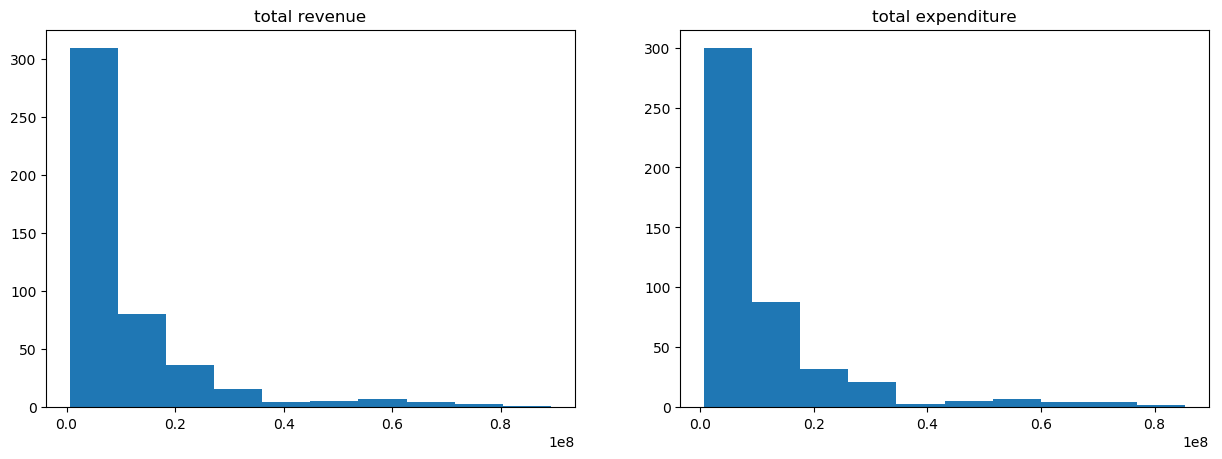

In [58]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(states_all["TOTAL_REVENUE"])
plt.title("total revenue")

plt.subplot(1,2,2)
plt.hist(states_all["TOTAL_EXPENDITURE"])
plt.title("total expenditure")
plt.show()

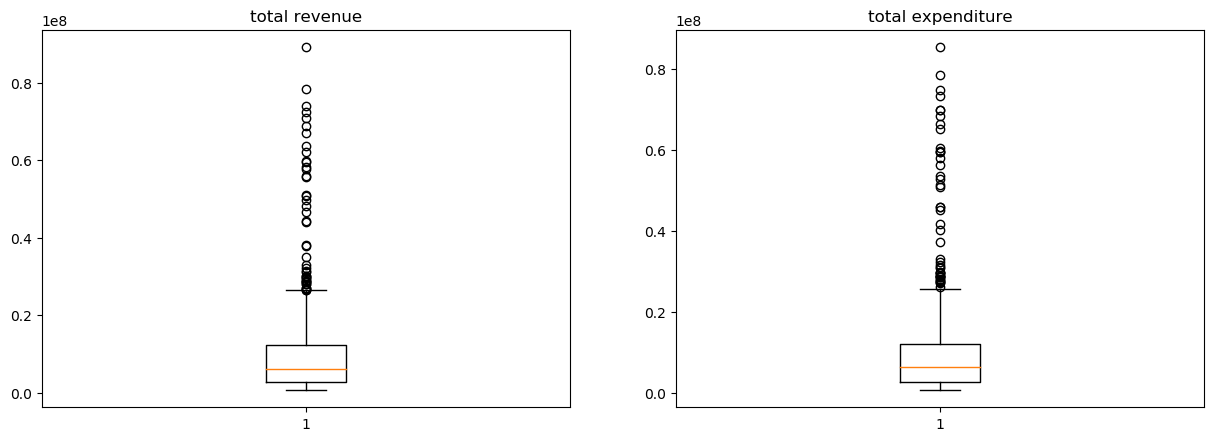

In [60]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(states_all["TOTAL_REVENUE"])
plt.title("total revenue")

plt.subplot(1,2,2)
plt.boxplot(states_all["TOTAL_EXPENDITURE"])
plt.title("total expenditure")
plt.show()

Her ikisinde de asiri degerler mevcut

2.Toplam gelir (TOTAL_REVENUE) ve toplam harcama (TOTAL_EXPENDITURE) değişkenlerinde aykırı değer tespit ettiyseniz bu derste öğrendiğiniz teknikleri uygulayarak bu aykırı değerleri ortadan kaldırın ve bunu yaptıktan sonra hiçbir aykırı değer kalmadığını doğrulayın.
#Ayriki degerlerimiz (Ortalama - Tstandart sapma, Ortalama + Tstandart sapma) 

In [72]:
from scipy.stats.mstats import winsorize

In [80]:
winsorize_revenue = winsorize(states_all["TOTAL_REVENUE"], (0, 0.10))
winsorize_expenditure = winsorize(states_all["TOTAL_EXPENDITURE"], (0, 0.10))

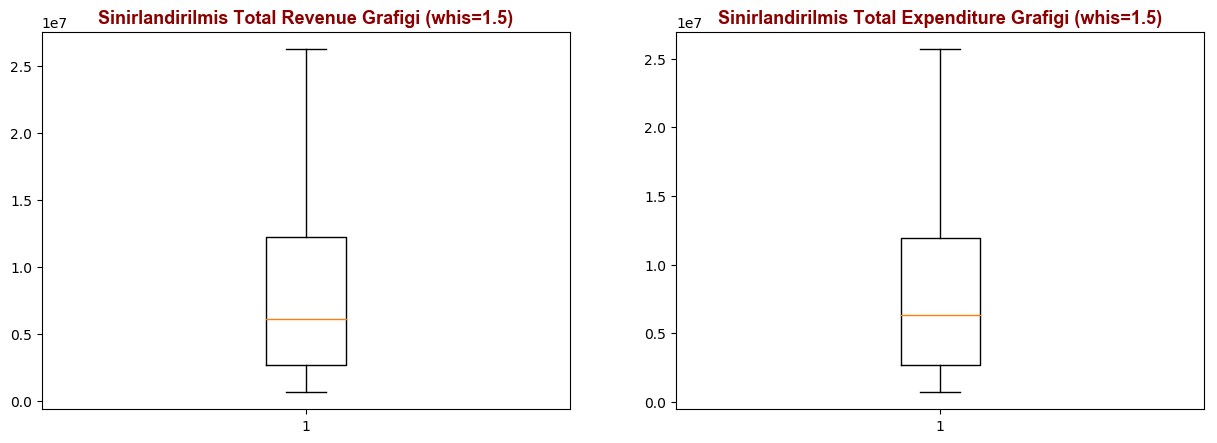

In [84]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.boxplot(winsorize_revenue)
plt.title("Sinirlandirilmis Total Revenue Grafigi (whis=1.5)", fontdict=baslik_font)

plt.subplot(1,2,2)
plt.boxplot(winsorize_expenditure)
plt.title("Sinirlandirilmis Total Expenditure Grafigi (whis=1.5)", fontdict=baslik_font)

plt.show()

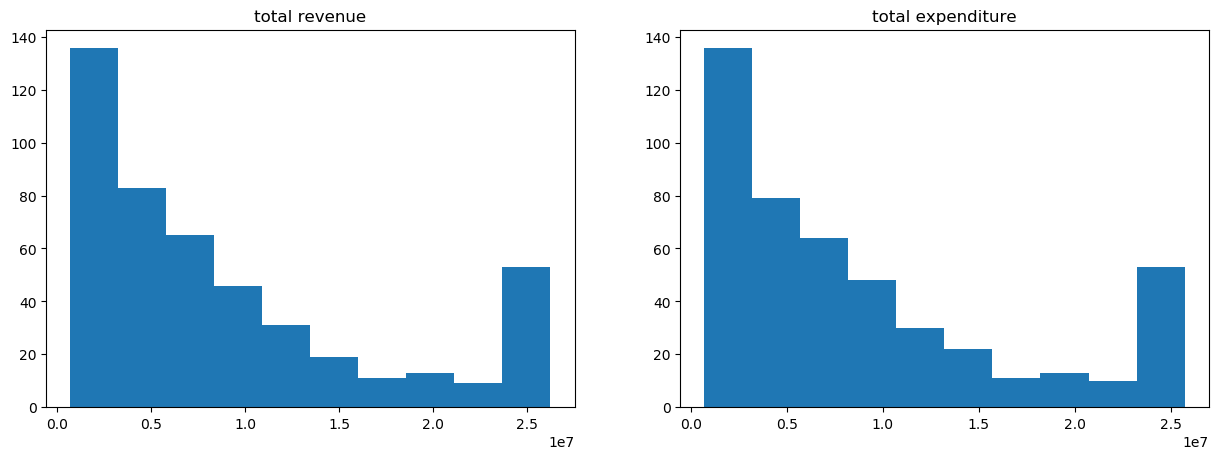

In [85]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(winsorize_revenue)
plt.title("total revenue")

plt.subplot(1,2,2)
plt.hist(winsorize_expenditure)
plt.title("total expenditure")
plt.show()

Degerler temizlenmis gibi gorunmekte. 

3. Toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama (TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun (aykırı değerleri temezlemeden). Bu yeni değişkende de aykırı değerler yer almakta mı? Varsa bu aykırı değerleri de temizleyin.

In [98]:
#Alternatif: budget_deficit = education_df.TOTAL_REVENUE - education_df.TOTAL_EXPENDITURE

states_all['budget_deficit'] = (states_all['TOTAL_REVENUE'] - states_all['TOTAL_EXPENDITURE']).astype(int)
states_all.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,budget_deficit
204,1996_ALABAMA,ALABAMA,1996,735912.00,3365113.00,334858.00,2138717.00,891538.00,3572283.00,1987018.00,...,58305.00,42510.00,469370.00,207980.00,686983.00,211.65,256.59,210.92,260.28,-207170
206,1996_ARIZONA,ARIZONA,1996,764681.00,4143304.00,378917.00,1798363.00,1966024.00,4391555.00,1860007.00,...,60514.00,42041.00,511925.00,210289.00,726709.00,217.58,267.87,206.53,263.28,-248251
207,1996_ARKANSAS,ARKANSAS,1996,452907.00,2183384.00,192152.00,1296247.00,694985.00,2297381.00,1264275.00,...,37064.00,27613.00,283883.00,131997.00,417860.00,215.85,261.65,208.84,271.83,-113997
208,1996_CALIFORNIA,CALIFORNIA,1996,5460484.00,31282981.00,2603882.00,17061474.00,11617625.00,31561692.00,16880730.00,...,406456.00,298669.00,3516572.00,1525618.00,5115423.00,209.13,262.77,201.91,269.20,-278711
209,1996_COLORADO,COLORADO,1996,655679.00,3891203.00,194998.00,1664676.00,2031529.00,4075165.00,2052264.00,...,52269.00,37179.00,423510.00,185700.00,621730.00,225.81,275.61,221.65,268.17,-183962


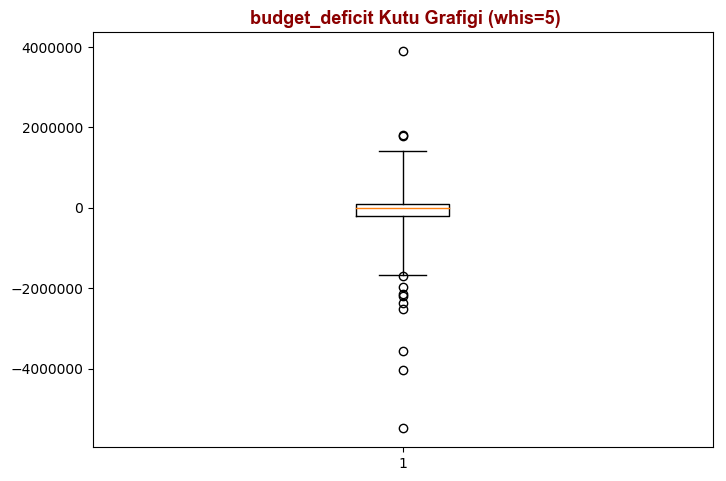

In [99]:
# Yeni degisken budget_deficit aykiri degerler almakta
plt.boxplot(states_all["budget_deficit"], whis=5)
plt.title(" budget_deficit Kutu Grafigi (whis=5)", fontdict=baslik_font)
plt.show()

In [107]:
budget_deficit = states_all["budget_deficit"]
winsorize_budget_deficit = winsorize(budget_deficit, (0.05,0.05))

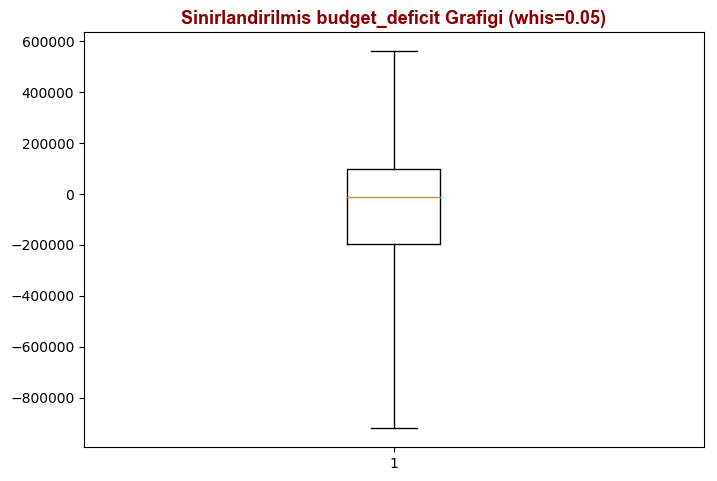

In [109]:
#Sinirlandirma sonrasi halen aykiri degerler mevcut
plt.boxplot(winsorize_budget_deficit, whis=5)
plt.title("Sinirlandirilmis budget_deficit Grafigi (whis=0.05)", fontdict=baslik_font)
plt.show()

Asiri degerler araliktan temizlendi. 

4.Yine toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama(TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun. Fakat bu sefer aykırı değerleri temezledikten sonra bu işlemi yapın. Bu yeni değişkende de aykırı değerler var mı? Varsa bunları da temizlemekte fayda var.

In [110]:
budget_deficit2 = winsorize_revenue - winsorize_expenditure

Text(0.5, 1.0, 'Box plot of budget deficit2')

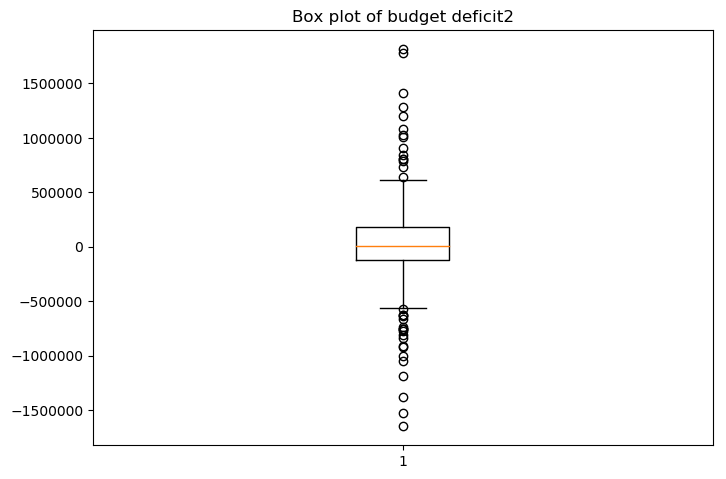

In [116]:
plt.boxplot(budget_deficit2)
plt.title("Box plot of budget deficit2")


Asiri degerler gorunuyor. 

In [117]:
winsorize_budget_deficit2 = winsorize(budget_deficit2, (0.05,0.05))

Text(0.5, 1.0, 'Box plot of winsorize budget deficit2')

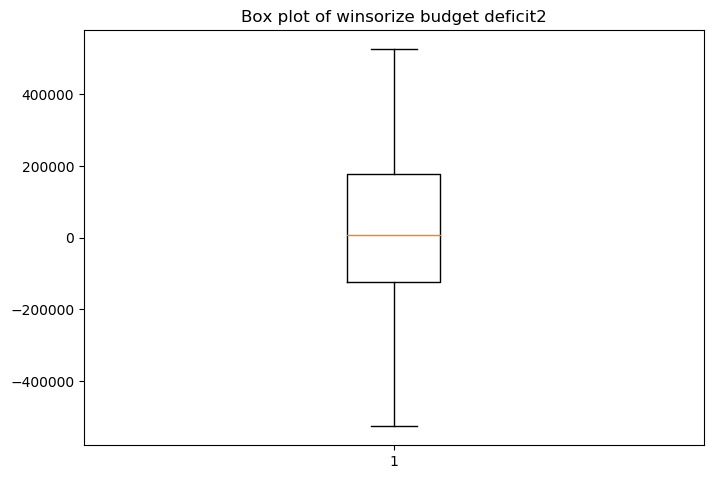

In [122]:
plt.boxplot(winsorize_budget_deficit2, whis=5)
plt.title("Box plot of winsorize budget deficit2")

5.Şimdi elimizde üçüncü ve ve dördüncü sorularda oluşturduğumuz iki farklı bütçe değişkeni var. Bu ikisi arasında fark görüyor musunuz?

In [126]:
pd.DataFrame({"orijinal_budget_deficit": budget_deficit, "winsorize_budget_deficit": winsorize_budget_deficit,
              "winsorize_budget_deficit2": winsorize_budget_deficit2}).describe()

,orijinal_budget_deficit,winsorize_budget_deficit,winsorize_budget_deficit2
count,466.00,466.00,466.00
mean,-83297.61,-61210.33,41285.33
std,614896.18,342588.03,287195.32
min,-5487742.00,-921134.00,-526142.00
25%,-196574.75,-196574.75,-122661.75
50%,-12823.50,-12823.50,7504.00
75%,98523.50,98523.50,178526.25
max,3897129.00,560511.00,526078.00


Sonuclar farklilik gosteriyor.

6.Bizim için bütçe açığı çok önemli bir değişken olsaydı aykırı değerleri temizlemek için hangi yöntem daha iyi olurdu. Üçüncü soruda uguladığınız yöntem mi yoksa dördüncü sorudaki yöntem mi?

3. sorudaki yontem